In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import shap
from scipy import stats
from sklearn.linear_model import LinearRegression

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\yekta\Desktop\2023_nba_player_stats.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

                     PName POS Team  Age  GP   W   L     Min   PTS  FGM  ...  \
0             Jayson Tatum  SF  BOS   25  74  52  22  2732.2  2225  727  ...   
1              Joel Embiid   C  PHI   29  66  43  23  2284.1  2183  728  ...   
2              Luka Doncic  PG  DAL   24  66  33  33  2390.5  2138  719  ...   
3  Shai Gilgeous-Alexander  PG  OKC   24  68  33  35  2416.0  2135  704  ...   
4    Giannis Antetokounmpo  PF  MIL   28  63  47  16  2023.6  1959  707  ...   

   REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  649  342  213   78   51  160  3691   31    1  470  
1  670  274  226   66  112  205  3706   39    1  424  
2  569  529  236   90   33  166  3747   36   10  128  
3  329  371  192  112   65  192  3425    3    0  149  
4  742  359  246   52   51  197  3451   46    6  341  

[5 rows x 30 columns]


In [4]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [5]:
# Check for missing values
print(df.isnull().sum())

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64


In [6]:
# Understand the distribution of numerical features
print(df.describe())

              Age          GP           W           L          Min  \
count  539.000000  539.000000  539.000000  539.000000   539.000000   
mean    25.970315   48.040816   24.018553   24.022263  1103.617625   
std      4.315513   24.650686   14.496366   13.445866   827.765114   
min     19.000000    1.000000    0.000000    0.000000     1.000000   
25%     23.000000   30.500000   12.000000   14.000000   329.000000   
50%     25.000000   54.000000   25.000000   25.000000   970.200000   
75%     29.000000   68.000000   36.000000   34.000000  1845.900000   
max     42.000000   83.000000   57.000000   60.000000  2963.200000   

               PTS         FGM          FGA         FG%         3PM  ...  \
count   539.000000  539.000000   539.000000  539.000000  539.000000  ...   
mean    523.426716  191.576994   403.005566   46.325232   56.324675  ...   
std     498.084360  178.351286   369.595909   10.967271   60.916821  ...   
min       0.000000    0.000000     0.000000    0.000000    0.0000

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

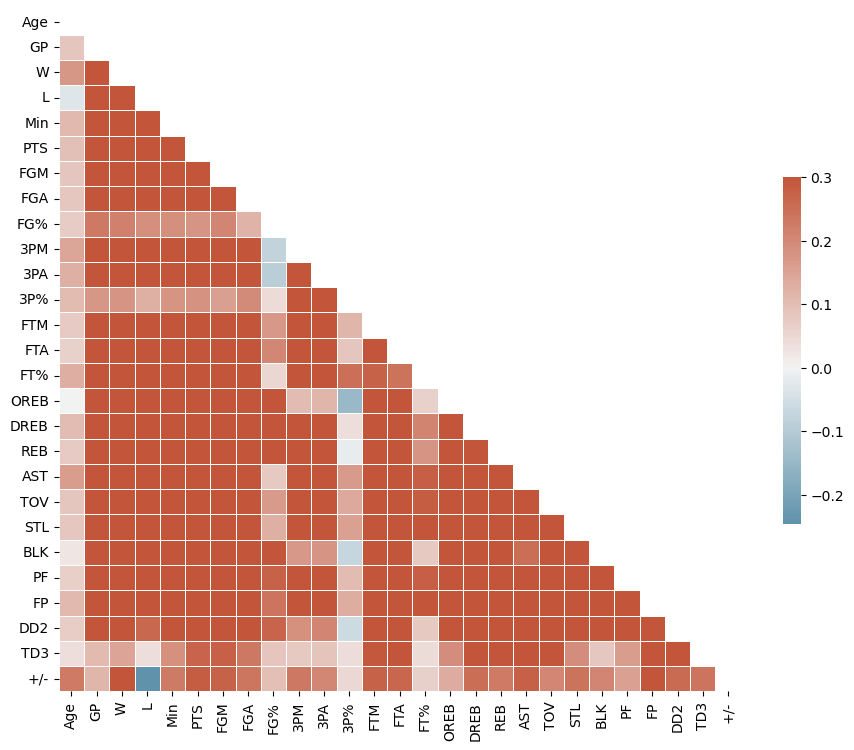

In [7]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
df['PPG'] = df['PTS'] / df['GP']

X = df.drop(['PTS', 'PName'], axis=1)
X = pd.get_dummies(X, columns=['Team', 'POS'])

In [9]:
y = df['PTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 1.848671717047118e-12
Mean Squared Error (MSE): 4.3646377447905234e-24
R-squared: 1.0


In [11]:
def predict_points(player_name):
    player_data = df[df['PName'] == player_name]
    if len(player_data) == 0:
        print(f"No data available for player: {player_name}")
        return None
    player_features = player_data.drop(['PTS', 'PName'], axis=1)
    player_features = pd.get_dummies(player_features, columns=['Team', 'POS'])
    missing_cols = set(X_train.columns) - set(player_features.columns)
    for c in missing_cols:
        player_features[c] = 0
    player_features = player_features[X_train.columns]
    points_prediction = model.predict(player_features)
    
    return points_prediction
all_player_names = df['PName'].unique()

for player_name in all_player_names:
    predicted_points = predict_points(player_name)
    
    if predicted_points is not None:
        print(f"Player Name: {player_name}")
        print(f"Predicted Points for {player_name} in the next season: {predicted_points[0]:.2f}")
    else:
        print(f"No data available for player: {player_name}")


Player Name: Jayson Tatum
Predicted Points for Jayson Tatum in the next season: 2225.00
Player Name: Joel Embiid
Predicted Points for Joel Embiid in the next season: 2183.00
Player Name: Luka Doncic
Predicted Points for Luka Doncic in the next season: 2138.00
Player Name: Shai Gilgeous-Alexander
Predicted Points for Shai Gilgeous-Alexander in the next season: 2135.00
Player Name: Giannis Antetokounmpo
Predicted Points for Giannis Antetokounmpo in the next season: 1959.00
Player Name: Anthony Edwards
Predicted Points for Anthony Edwards in the next season: 1946.00
Player Name: Julius Randle
Predicted Points for Julius Randle in the next season: 1936.00
Player Name: Donovan Mitchell
Predicted Points for Donovan Mitchell in the next season: 1922.00
Player Name: Trae Young
Predicted Points for Trae Young in the next season: 1914.00
Player Name: Zach LaVine
Predicted Points for Zach LaVine in the next season: 1913.00
Player Name: Damian Lillard
Predicted Points for Damian Lillard in the nex

Player Name: De'Andre Hunter
Predicted Points for De'Andre Hunter in the next season: 1029.00
Player Name: Malik Beasley
Predicted Points for Malik Beasley in the next season: 1025.00
Player Name: Norman Powell
Predicted Points for Norman Powell in the next season: 1019.00
Player Name: Tim Hardaway Jr.
Predicted Points for Tim Hardaway Jr. in the next season: 1019.00
Player Name: Derrick White
Predicted Points for Derrick White in the next season: 1017.00
Player Name: Luguentz Dort
Predicted Points for Luguentz Dort in the next season: 1013.00
Player Name: Jabari Smith Jr.
Predicted Points for Jabari Smith Jr. in the next season: 1010.00
Player Name: Malcolm Brogdon
Predicted Points for Malcolm Brogdon in the next season: 1000.00
Player Name: Bobby Portis
Predicted Points for Bobby Portis in the next season: 987.00
Player Name: Keegan Murray
Predicted Points for Keegan Murray in the next season: 976.00
Player Name: Kelly Oubre Jr.
Predicted Points for Kelly Oubre Jr. in the next season

Player Name: Draymond Green
Predicted Points for Draymond Green in the next season: 617.00
Player Name: Al Horford
Predicted Points for Al Horford in the next season: 616.00
Player Name: Kyle Lowry
Predicted Points for Kyle Lowry in the next season: 615.00
Player Name: Jeremy Sochan
Predicted Points for Jeremy Sochan in the next season: 614.00
Player Name: Jalen Duren
Predicted Points for Jalen Duren in the next season: 612.00
Player Name: Cam Thomas
Predicted Points for Cam Thomas in the next season: 604.00
Player Name: Damion Lee
Predicted Points for Damion Lee in the next season: 604.00
Player Name: Karl-Anthony Towns
Predicted Points for Karl-Anthony Towns in the next season: 602.00
Player Name: Moritz Wagner
Predicted Points for Moritz Wagner in the next season: 600.00
Player Name: Torrey Craig
Predicted Points for Torrey Craig in the next season: 588.00
Player Name: Thomas Bryant
Predicted Points for Thomas Bryant in the next season: 579.00
Player Name: Kevon Looney
Predicted Poi

Player Name: Mo Bamba
Predicted Points for Mo Bamba in the next season: 323.00
Player Name: Yuta Watanabe
Predicted Points for Yuta Watanabe in the next season: 322.00
Player Name: Chimezie Metu
Predicted Points for Chimezie Metu in the next season: 321.00
Player Name: Montrezl Harrell
Predicted Points for Montrezl Harrell in the next season: 320.00
Player Name: Derrick Jones Jr.
Predicted Points for Derrick Jones Jr. in the next season: 319.00
Player Name: Joe Ingles
Predicted Points for Joe Ingles in the next season: 317.00
Player Name: T.J. Warren
Predicted Points for T.J. Warren in the next season: 314.00
Player Name: Ty Jerome
Predicted Points for Ty Jerome in the next season: 309.00
Player Name: Moses Moody
Predicted Points for Moses Moody in the next season: 302.00
Player Name: R.J. Hampton
Predicted Points for R.J. Hampton in the next season: 302.00
Player Name: Romeo Langford
Predicted Points for Romeo Langford in the next season: 297.00
Player Name: Vlatko Cancar
Predicted Po

Player Name: Nathan Knight
Predicted Points for Nathan Knight in the next season: 139.00
Player Name: Frank Ntilikina
Predicted Points for Frank Ntilikina in the next season: 135.00
Player Name: Markieff Morris
Predicted Points for Markieff Morris in the next season: 132.00
Player Name: Richaun Holmes
Predicted Points for Richaun Holmes in the next season: 130.00
Player Name: Chuma Okeke
Predicted Points for Chuma Okeke in the next season: 128.00
Player Name: Max Christie
Predicted Points for Max Christie in the next season: 128.00
Player Name: Udoka Azubuike
Predicted Points for Udoka Azubuike in the next season: 125.00
Player Name: Jae Crowder
Predicted Points for Jae Crowder in the next season: 124.00
Player Name: Juancho Hernangomez
Predicted Points for Juancho Hernangomez in the next season: 122.00
Player Name: Matt Ryan
Predicted Points for Matt Ryan in the next season: 122.00
Player Name: Patrick Baldwin Jr.
Predicted Points for Patrick Baldwin Jr. in the next season: 122.00
Pla

Player Name: Tyrese Martin
Predicted Points for Tyrese Martin in the next season: 21.00
Player Name: Carlik Jones
Predicted Points for Carlik Jones in the next season: 20.00
Player Name: Justin Jackson
Predicted Points for Justin Jackson in the next season: 20.00
Player Name: Louis King
Predicted Points for Louis King in the next season: 20.00
Player Name: Ron Harper Jr.
Predicted Points for Ron Harper Jr. in the next season: 20.00
Player Name: JD Davison
Predicted Points for JD Davison in the next season: 19.00
Player Name: Tony Bradley
Predicted Points for Tony Bradley in the next season: 19.00
Player Name: Andre Iguodala
Predicted Points for Andre Iguodala in the next season: 17.00
Player Name: Justin Minaya
Predicted Points for Justin Minaya in the next season: 17.00
Player Name: Michael Carter-Williams
Predicted Points for Michael Carter-Williams in the next season: 17.00
Player Name: Xavier Sneed
Predicted Points for Xavier Sneed in the next season: 17.00
Player Name: Buddy Boehe